## Importing Libraries 

In [2]:
import numpy as np 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency, shapiro
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import kstest, norm

/var/folders/5q/fz2ywvjs02ldr5cws68xhsph0000gp/T/ipykernel_9757/2551597201.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Getting the data

Here in the data, Loan status is our target variable and others are features 

In [3]:
data = pd.read_csv('/Users/Antara/Documents/scalar/09_Feature_Engineering_1/loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Basic Exploration 

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From the above info data we saw that Dependant column is 'object' but it should be number. Lets try to investigate more on that

In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

We can notice from above that there is '3+' which is making entire column as 'object'

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


from the above data we can see that mean of credit history is 0.842199 which means that 84.2% people in the data have credit history 

Lets try to find the missing values 

In [9]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.isna().sum()/data.shape[0]*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Let us now seperate categorical columns and numerical columns 

In [11]:
cat_cols = data.dtypes == 'object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [50]:
numerical_cols = data.dtypes == 'float64'
numerical_cols = list(numerical_cols[numerical_cols].index)
numerical_cols

['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [12]:
cat_cols.remove("Loan_Status")
cat_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

## Univariate Analysis 

Target variable = Loan status 

In [13]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='Loan_Status', ylabel='count'>

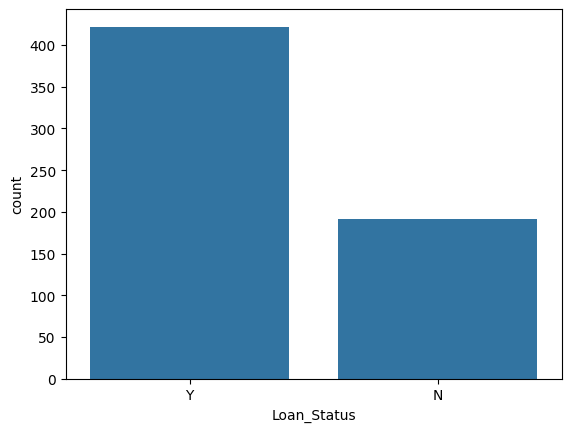

In [14]:
sns.countplot(data= data, x = "Loan_Status")

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

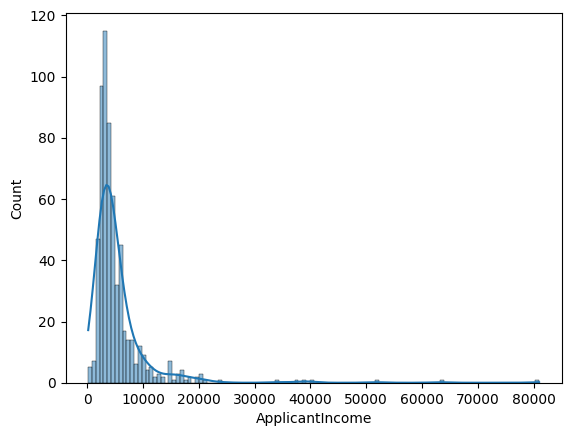

In [15]:
sns.histplot(data= data, x = "ApplicantIncome", kde = True)

<Axes: xlabel='ApplicantIncome'>

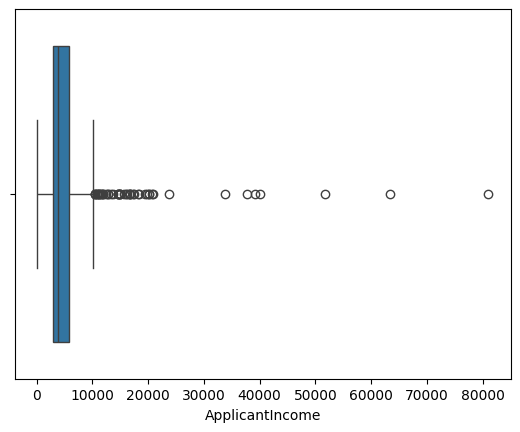

In [16]:
sns.boxplot(data= data, x = "ApplicantIncome")

### We are checking if the distribution is normal or not

checking with qqplot

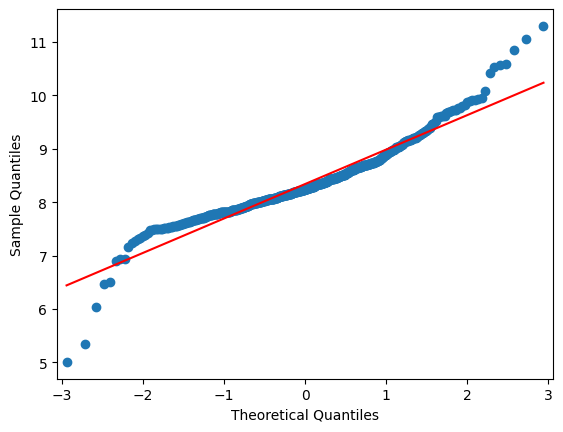

In [17]:
qqplot(np.log(data["ApplicantIncome"]), line= "s")
plt.show()


checking using Shapiro test

In [18]:
shapiro(np.log(data["ApplicantIncome"]))

ShapiroResult(statistic=0.935165394990309, pvalue=1.1198134091840294e-15)

When we used qqplot (graph does not show normal distribution) and Shapiro (p value < 0.05) test we confirmed that the data is not normally distributed. 

Let us check using KS Test also
Ho = the distribution is Gaussian 
Ha = It is not Gaussian 

In [19]:
Log_ApplicationIncome = np.log(data["ApplicantIncome"])
print(Log_ApplicationIncome)
z_values_ApplicantIncome = Log_ApplicationIncome - Log_ApplicationIncome.mean()/ Log_ApplicationIncome.std()
print(z_values_ApplicantIncome)


0      8.674026
1      8.430109
2      8.006368
3      7.856707
4      8.699515
         ...   
609    7.972466
610    8.320205
611    8.996157
612    8.933664
613    8.430109
Name: ApplicantIncome, Length: 614, dtype: float64
0     -4.252812
1     -4.496729
2     -4.920471
3     -5.070132
4     -4.227324
         ...   
609   -4.954372
610   -4.606634
611   -3.930682
612   -3.993174
613   -4.496729
Name: ApplicantIncome, Length: 614, dtype: float64


In [20]:
kstest(z_values_ApplicantIncome, norm.cdf)

KstestResult(statistic=0.9864083745080789, pvalue=0.0, statistic_location=-2.8492714187042907, statistic_sign=1)

looking at the pvalue above we can say that we reject the null hypothesis 

In [21]:
data_numeric = data.select_dtypes(include='number')
data.groupby(["Loan_Status"])[data_numeric.columns].mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


from the above data we see that loan status was no where loan amount was more, loan term was more and credit history was less 

### Does Application income effect loan status ?

In [22]:
df_loan_status_Y = data[data["Loan_Status"]== "Y"]["ApplicantIncome"]
df_loan_status_N = data[data["Loan_Status"]== "N"]["ApplicantIncome"]

In [23]:
df_loan_status_N.mean()

5446.078125

In [24]:
df_loan_status_Y.mean()

5384.068720379147

In [25]:
ttest_ind(df_loan_status_Y, df_loan_status_N, alternative= 'greater')

TtestResult(statistic=-0.11650844828724542, pvalue=0.5463560939347409, df=612.0)

From above result we fail to reject the null hypotheses. It is telling us both of them are same 

In [26]:
ttest_ind(df_loan_status_Y, df_loan_status_N, alternative= 'less')

TtestResult(statistic=-0.11650844828724542, pvalue=0.453643906065259, df=612.0)

From above result we fail to reject the null hypotheses. It is telling us both of them are same 

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

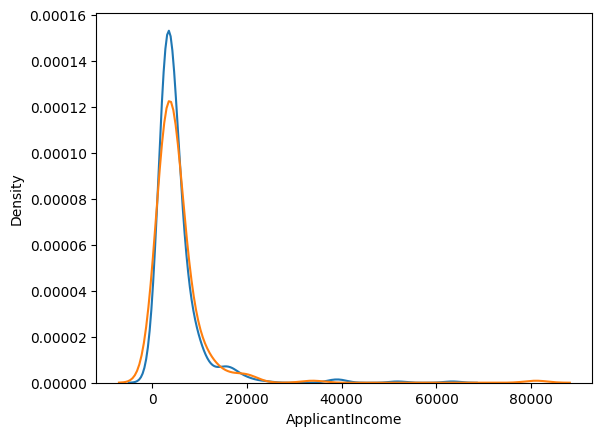

In [27]:
sns.kdeplot(df_loan_status_Y)
sns.kdeplot(df_loan_status_N)

In [28]:
kstest(df_loan_status_Y, df_loan_status_N)

KstestResult(statistic=0.04393759873617693, pvalue=0.9480203334325082, statistic_location=3333, statistic_sign=1)

From above we can see that the distribution is also same. So Applicant income has no effect on loan status 

### Binning the Income 

In [29]:
bins = [0, 2500, 4000, 6000, 8000, 10000, 81000]
labels = ['Low', 'Average', 'Medium', 'High1', 'High2', 'Very High']
data["Income Bins"] = pd.cut(data["ApplicantIncome"], bins = bins, labels = labels)



In [30]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income Bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Medium
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Medium
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,Medium
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,High2
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,High1


In [31]:
pd.crosstab(data['Income Bins'], data['Loan_Status'])

Loan_Status,N,Y
Income Bins,,
Low,34,74
Average,67,159
Medium,45,98
High1,20,34
High2,9,22
Very High,17,35


We want to find out if Loan status is independant of income bins, so we will use chi square contingency test. Ho: Variables are independant Ha: variables are dependant 

In [32]:
chi2_contingency(pd.crosstab(data['Income Bins'], data['Loan_Status']))

Chi2ContingencyResult(statistic=1.2390175474316056, pvalue=0.941079844721327, dof=5, expected_freq=array([[ 33.77198697,  74.22801303],
       [ 70.67100977, 155.32899023],
       [ 44.71661238,  98.28338762],
       [ 16.88599349,  37.11400651],
       [  9.69381107,  21.30618893],
       [ 16.26058632,  35.73941368]]))

From the p value above, we fail to reject NULL hypothesis 

### Lets check other variables 

Applicant Income and Maritial Status 

In [33]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income Bins'],
      dtype='object')

We believe that the loan.csv data shows that unmarried men are in a different income group than both married and unmarried women.Lets check that

In [40]:
unmarried_man = data[(data["Gender"]== "Male") & (data["Married"] == "No")]["ApplicantIncome"]
women = data[data["Gender"]== "Female"]["ApplicantIncome"]
t_stat, p_value = ttest_ind(unmarried_man, women)
t_stat


1.1403012035198827

In [39]:
p_value

0.25529750307622384

From the above p_value we can say that we can conculde that income of both group are similar 

graduate unmarried men are in a different income group than both married and unmarried graduate women.

In [42]:
graduate_unmarried_men = data[(data["Education"] == "Graduate") & (data["Married"] == "No") & (data["Gender"]== "Male")]["ApplicantIncome"]
graduate_women = data[(data["Education"] == "Graduate") & (data["Gender"]== "Female")]["ApplicantIncome"]

In [43]:
ttest_ind(graduate_unmarried_men, graduate_women)

TtestResult(statistic=1.75360894634636, pvalue=0.0811185605889597, df=189.0)

Looking at the p_value above we can say that income of both group is similar 

To prvove if graduate unmarried men are more likely to get a loan than graduate women.

In [46]:
graduate_unmarried_men_1 = (data["Education"] == "Graduate") & (data["Married"] == "No") & (data["Gender"]== "Male")
graduate_women_1 = (data["Education"] == "Graduate") & (data["Gender"]== "Female")

In [47]:
chi2_contingency(graduate_unmarried_men_1, graduate_women_1)

TypeError: '<' not supported between instances of 'str' and 'int'

### How are feature effect loan status 

In [60]:
def univariate_analysis (df, x_cols: list):
  for items in x_cols:
    print(f"\n--- Analyzing: {items} ---")
    if items in ['Gender','Married','Dependents','Education','Self_Employed','Property_Area',]:
      sns.countplot(data = df, x = items, hue = "Loan_Status")
      plt.title(f"Countplot of {items} by Loan_Status")
      value = pd.crosstab(df[items], df["Loan_Status"])
      print("Crosstab:")
      print(value)
      chi2, p, dof, expected = chi2_contingency(value)
      print(f"Chi2 statistic: {chi2}, p-value: {p}")
      plt.show()
      plt.clf ()
    else: 
      sns.boxplot(data = df, y = items, x = 'Loan_Status')
      plt.title(f"Boxplot of {items} by Loan_Status") 
      df_accor = df[df["Loan_Status"] == "Y"][items]
      df_rej = df[df["Loan_Status"] == "N"][items]
      t_stat, p_value = ttest_ind(df_accor, df_rej)
      print(f"T-test statistic: {t_stat}, p-value: {p_value}")
      plt.show()
      plt.clf ()



--- Analyzing: Gender ---
Crosstab:
Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339
Chi2 statistic: 0.13962612116543877, p-value: 0.7086529816451106


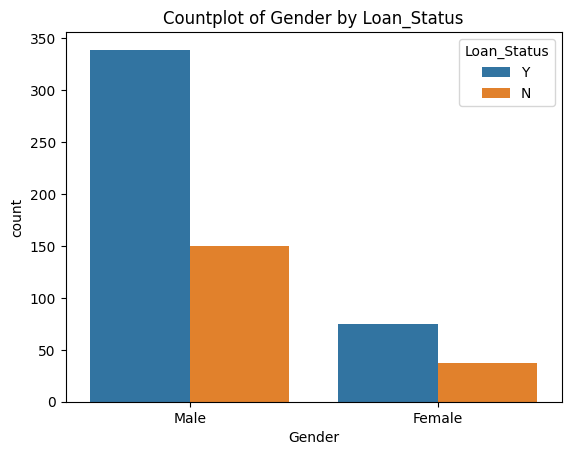


--- Analyzing: Married ---
Crosstab:
Loan_Status    N    Y
Married              
No            79  134
Yes          113  285
Chi2 statistic: 4.475019348315097, p-value: 0.03439381301579988


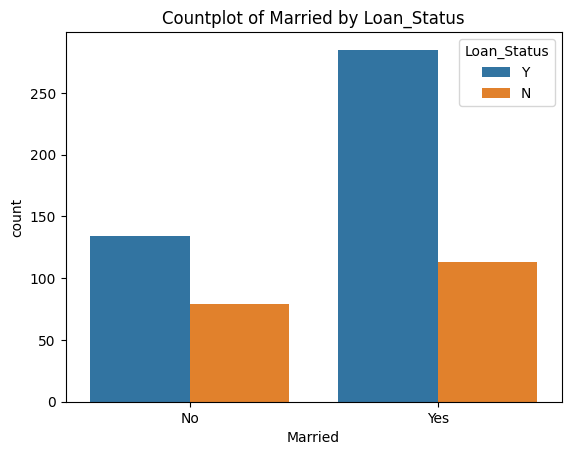


--- Analyzing: Dependents ---
Crosstab:
Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33
Chi2 statistic: 3.158339770698263, p-value: 0.3678506740863211


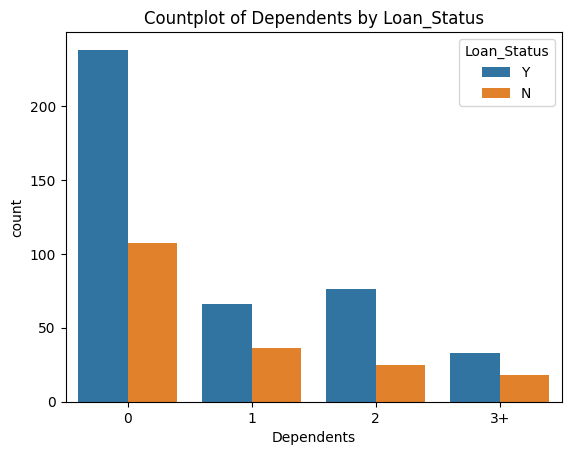


--- Analyzing: Education ---
Crosstab:
Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82
Chi2 statistic: 4.091490413303621, p-value: 0.04309962129357355


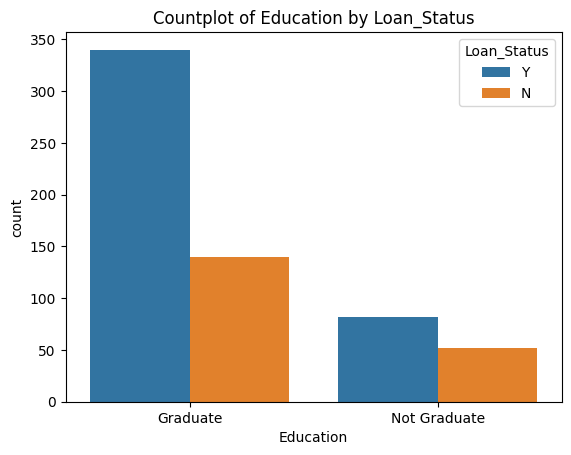


--- Analyzing: Self_Employed ---
Crosstab:
Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56
Chi2 statistic: 0.0, p-value: 1.0


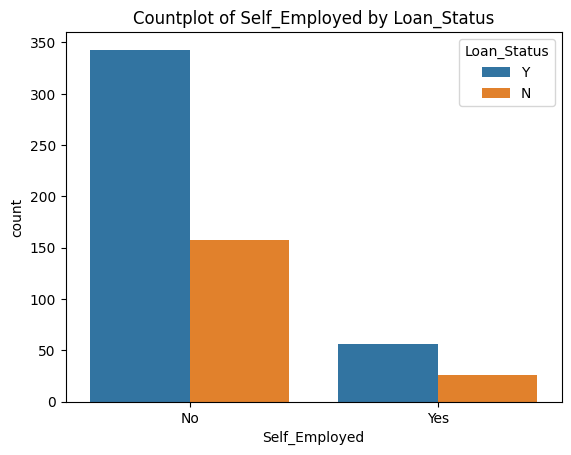


--- Analyzing: ApplicantIncome ---
T-test statistic: -0.11650844828724542, p-value: 0.907287812130518


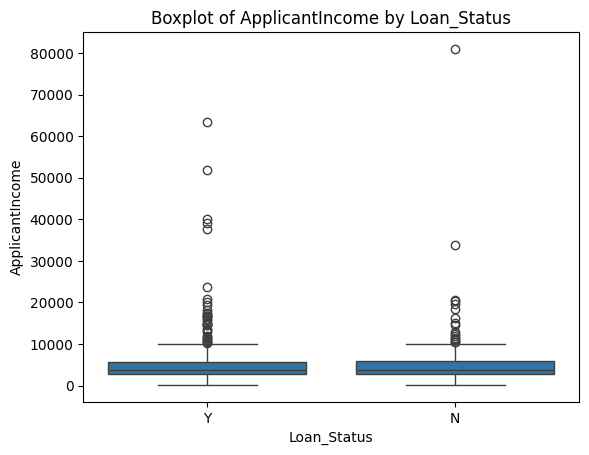


--- Analyzing: CoapplicantIncome ---
T-test statistic: -1.4667846999020244, p-value: 0.14294828684286362


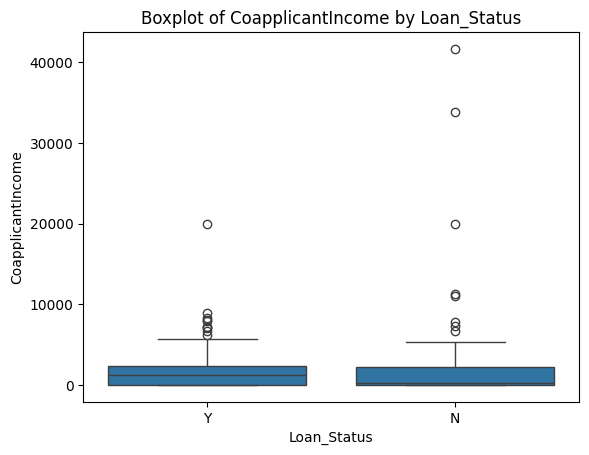


--- Analyzing: Property_Area ---
Crosstab:
Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133
Chi2 statistic: 12.297623130485675, p-value: 0.0021360187811644937


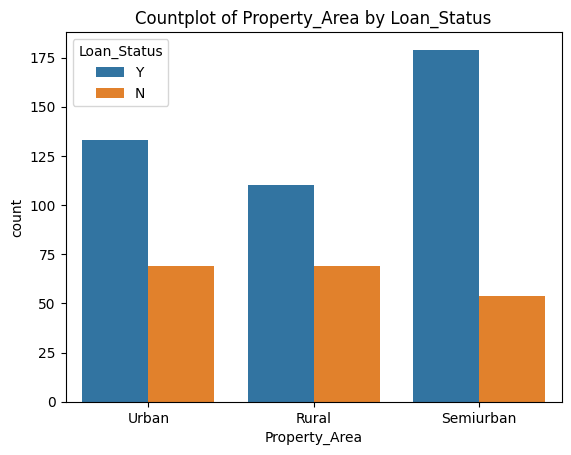

<Figure size 640x480 with 0 Axes>

In [62]:
univariate_analysis(data, x_cols=[ 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome','CoapplicantIncome',  'Property_Area'] )

### Gender
From the above data we can see that for 
gender, Among females: 37 loans where not approved and 75 loans were approved. Among males 150 loans were not approved and 339 were approved. 
chi square statistics: 0.14(round) and p value = 0.71 (round)

considering Ho = There is no association between gender and loan status. P value is greater than 0.05 so we fail to reject null hypothesis. There is no statistically significant relationship between person's gender and Loan status 

### Married 
from the above data we can see that, Among unmarried:  79 loans were not approved and 134 were approved. Among married: 113 loans were not approved and 285 loans were approved. chi square statistics: 4.47 and p value = 0.034

considering Ho = There is no association between martial status and loan status. P value is less that 0.05, so we reject null hypothesis and there a significant relationship between person's martial status and loan status 

### Dependants 
we see that the p- value is 0.36 and chi square value is 3.15 
considering Ho = The number of dependants and loan status has no association. p value is greater than 0.05 so we fail to reject the null hypothesis. There is no statistically significant relationship between number of dependants and Loan status 

### Education
from the above data we can see that, Among Not graduate:  52 loans were not approved and 82 were approved. Among graduated: 140 loans were not approved and 340 loans were approved. chi square statistics: 4.09 and p value = 0.034

considering Ho = There is no association between education and loan status. P value is less that 0.05, so we reject null hypothesis and there a significant relationship between person's education and loan status

### Self Employed
we see that the p- value is 1 and chi square value is 0.0
considering Ho = self employed and loan status has no association. p value is greater than 0.05 so we fail to reject the null hypothesis. There is no statistically significant relationship between self employed and Loan status 